In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
np.random.seed(52)

In [3]:
df = pd.read_csv('digit_data.csv')

In [4]:
df.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data = np.array(df)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into abc and training sets

data_abc = data[0:1000].T
Y_abc = data_abc[0]
X_abc = data_abc[1:n]
X_abc = X_abc / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [6]:
Y_train

array([3, 4, 4, ..., 5, 1, 5], dtype=int64)

In [7]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    
    
    W2 = np.random.rand(14, 10) - 0.5
    b2 = np.random.rand(14, 1) - 0.5
    
    W3 = np.random.rand(11,14) - 0.5
    b3 = np.random.rand(11, 1) - 0.5
    
    W4 = np.random.rand(10,11) - 0.5
    b4 = np.random.rand(10, 1) - 0.5
    
    return W1, b1, W2, b2, W3, b3, W4, b4


In [8]:
def ReLU(Z):
    return np.maximum(Z, 0)


In [9]:
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [10]:
def ReLU_deriv(Z):
    return Z > 0


In [11]:
def sigmoid(x):
  
    return 1 / (1 + np.exp(-x))

In [12]:
def tanh(x):
   
    return np.tanh(x)

In [13]:
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [14]:
def tanh_derivative(x):
    return 1 - tanh(x)**2

In [15]:
def forward_prop(W1, b1, W2, b2,W3,b3,W4,b4, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    
    Z2 = W2.dot(A1) + b2
    A2 = sigmoid(Z2)
    
    Z3 = W3.dot(A2) + b3
    A3 = tanh(Z3)
    
    Z4 = W4.dot(A3) + b4
    A4 = softmax(Z4)
    return Z1, A1, Z2, A2, Z3,A3,Z4,A4

In [16]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y


In [17]:
def backward_prop(Z1, A1, Z2, A2, Z3, A3, Z4,A4, W1, W2,W3,W4, X, Y):
    one_hot_Y = one_hot(Y)
    
    dZ4 = A4 - one_hot_Y
    dW4 = 1 / m * dZ4.dot(A3.T)
    db4 = 1 / m * np.sum(dZ4)
    
    dZ3 = W4.T.dot(dZ4) * tanh_derivative(Z3)
    dW3 = 1 / m * dZ3.dot(A2.T)
    db3 = 1 / m * np.sum(dZ3)
    
    dZ2 = W3.T.dot(dZ3) * sigmoid_derivative(Z2)
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    
    
    
    
    return dW1, db1, dW2, db2, dW3, db3, dW4,db4

In [18]:

def update_params(W1, b1, W2, b2,W3,b3,W4,b4, dW1, db1, dW2, db2,dW3,db3,dW4,db4, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2 
    
    W3 = W3 - alpha * dW3
    b3 = b3 - alpha * db3    
    
    W4 = W4 - alpha * dW4  
    b4 = b4 - alpha * db4 
    
    return W1, b1, W2, b2, W3, b3, W4, b4

In [19]:
def get_predictions(A2):
    return np.argmax(A2, 0)


In [20]:
def get_accuracy(predictions, Y):
    #print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

In [21]:

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2, W3, b3, W4, b4 = init_params()
    accuracy_scores = []
    for i in range(iterations):
        Z1, A1, Z2, A2, Z3, A3, Z4, A4 = forward_prop(W1, b1, W2, b2,W3,b3,W4,b4, X)
        dW1, db1, dW2, db2, dW3, db3, dW4,db4 = backward_prop(Z1, A1, Z2, A2, Z3, A3, Z4,A4, W1, W2,W3,W4, X, Y)
        W1, b1, W2, b2, W3, b3, W4, b4 = update_params(W1, b1, W2, b2,W3,b3,W4,b4, dW1, db1, dW2, db2,dW3,db3,dW4,db4, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A4)
            accuracy = get_accuracy(predictions, Y)
            print(accuracy)
            accuracy_scores.append((i, accuracy))
    
    # Convert accuracy_scores to separate lists for plotting
    iterations, accuracies = zip(*accuracy_scores)
    
    # Plotting accuracy vs iterations
    plt.plot(iterations, accuracies)
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Iterations')
    legend_handles = [
        plt.Line2D([], [], marker='o', color='w', label='THA076BEI009\nTHA076BEI036', markersize=10, markerfacecolor='black', alpha=0)
    ]
    plt.legend(handles=legend_handles, loc='upper center', bbox_to_anchor=(0.84, 1.12))  # Adjust the bbox_to_anchor values

    plt.show()
      
    return W1, b1, W2, b2, W3,b3,W4,b4

Iteration:  0
0.09719512195121952
Iteration:  10
0.126
Iteration:  20
0.14370731707317072
Iteration:  30
0.1778780487804878
Iteration:  40
0.23229268292682928
Iteration:  50
0.27221951219512197
Iteration:  60
0.29997560975609755
Iteration:  70
0.31653658536585366
Iteration:  80
0.33165853658536587
Iteration:  90
0.34580487804878046
Iteration:  100
0.361390243902439
Iteration:  110
0.37429268292682927
Iteration:  120
0.3878780487804878
Iteration:  130
0.40190243902439027
Iteration:  140
0.41678048780487803
Iteration:  150
0.4318292682926829
Iteration:  160
0.44726829268292684
Iteration:  170
0.4624878048780488
Iteration:  180
0.4779512195121951
Iteration:  190
0.4934878048780488
Iteration:  200
0.5094390243902439
Iteration:  210
0.5231463414634147
Iteration:  220
0.5364634146341464
Iteration:  230
0.5483658536585366
Iteration:  240
0.5587560975609757
Iteration:  250
0.569
Iteration:  260
0.5788048780487804
Iteration:  270
0.5872195121951219
Iteration:  280
0.5949024390243902
Iteration: 

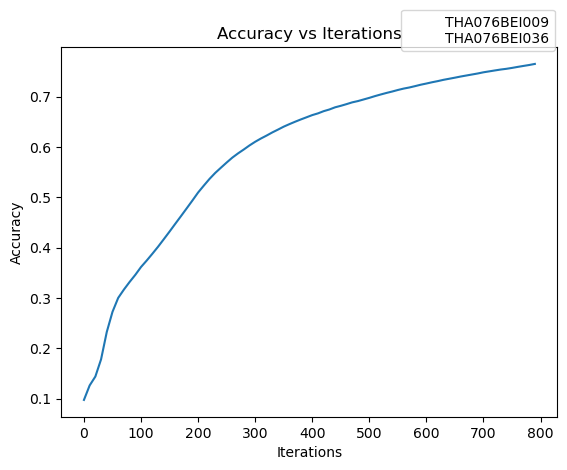

In [22]:
W1, b1, W2, b2, W3,b3,W4,b4 = gradient_descent(X_train, Y_train, 0.10, 800)

In [23]:
def make_predictions(X, W1, b1, W2, b2,W3,b3,W4,b4):
    Z1, A1, Z2, A2, Z3,A3,Z4,A4 = forward_prop(W1, b1, W2, b2,W3,b3,W4,b4, X)
    predictions = get_predictions(A4)
    return predictions

def test_prediction(index, W1, b1, W2, b2,W3,b3,W4,b4):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2,W3,b3,W4,b4)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    legend_handles = [
        plt.Line2D([], [], marker='o', color='w', label='THA076BEI009\nTHA076BEI036', markersize=10, markerfacecolor='black', alpha=0)
    ]
    plt.legend(handles=legend_handles, loc='upper center', bbox_to_anchor=(0.84, 1.12))  # Adjust the bbox_to_anchor values

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [3]
Label:  3


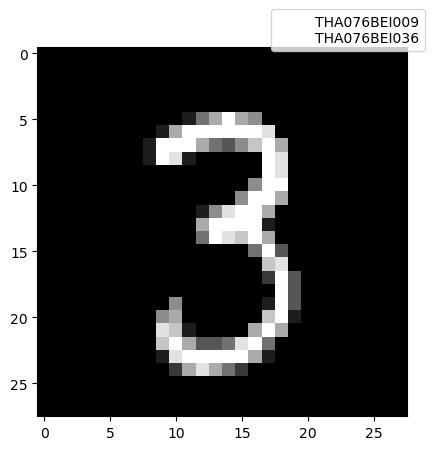

In [24]:
test_prediction(0, W1, b1, W2, b2,W3,b3,W4,b4)

Prediction:  [4]
Label:  4


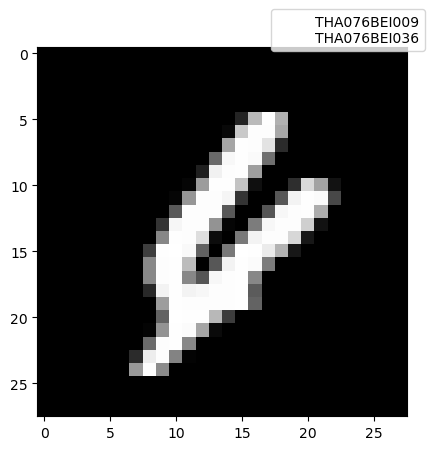

In [25]:
test_prediction(1, W1, b1, W2, b2,W3,b3,W4,b4)

Prediction:  [9]
Label:  4


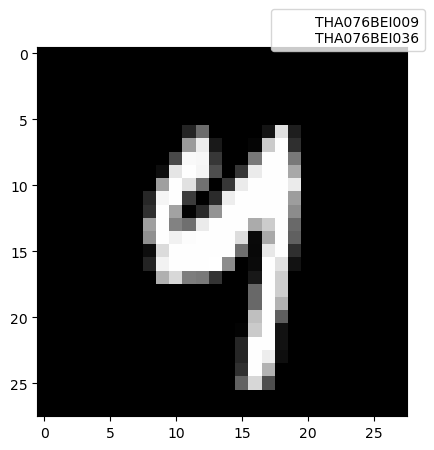

In [26]:

test_prediction(2, W1, b1, W2, b2,W3,b3,W4,b4)

Prediction:  [6]
Label:  2


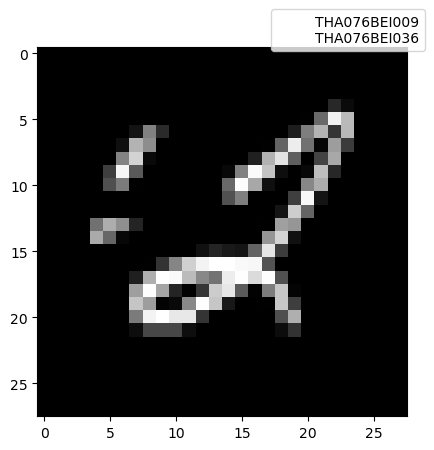

In [27]:


test_prediction(3, W1, b1, W2, b2,W3,b3,W4,b4)

In [28]:
abc_predictions = make_predictions(X_abc, W1, b1, W2, b2, W3, b3, W4, b4)
get_accuracy(abc_predictions, Y_abc)

0.77

In [29]:
from sklearn.metrics import classification_report

abc_predictions = make_predictions(X_abc, W1, b1, W2, b2, W3, b3, W4, b4)
report = classification_report(abc_predictions,Y_abc, digits=4)

print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0     0.8925    0.8557    0.8737        97
           1     0.9825    0.9655    0.9739       116
           2     0.7664    0.7321    0.7489       112
           3     0.7143    0.6410    0.6757       117
           4     0.7957    0.8132    0.8043        91
           5     0.3956    0.6923    0.5035        52
           6     0.8817    0.7961    0.8367       103
           7     0.8000    0.7921    0.7960       101
           8     0.7400    0.6727    0.7048       110
           9     0.6923    0.7129    0.7024       101

    accuracy                         0.7700      1000
   macro avg     0.7661    0.7674    0.7620      1000
weighted avg     0.7859    0.7700    0.7751      1000

